# ¡Hola!  

Mi nombre es Carlos Ortiz, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hola, muchas gracias por tus comentarios y la revisión Carlos.
</div>

¡Empecemos!


# Descripción del proyecto

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [51]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from catboost import CatBoostRegressor
import xgboost as xgb

Comenzamos leyendo el archivo de los datos disponibles

In [52]:
try:
    car_data = pd.read_csv('datasets/car_data.csv')
except:
    car_data = pd.read_csv('/datasets/car_data.csv')

Vamos a revisar unas cuantos columnas para explorar los datos 

In [53]:
car_data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


Hay algunos datos no disponibles, se va mostrar un resumen para ver donde faltan valores.

In [54]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Hay 5 características con datas faltantes, eventualmente habrá que rellenarlas. Vamos a revisar una descripción general de los datos númericos disponibles.

In [55]:
car_data.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Hay datos que no tienen mucho sentido:
- En registration_year, el año mínimo es 1000 y el máximo es 9999. 
- En Price, hay un precio mínimo de cero
- En Power, hay un valor mínimo de cero y también un máximo de 20000, muy por encima de la mayoría de datos.
- En RegistrationMonth hay valores de cero. Se debería considerar que los valores correctos van de 1 al 12. 
- En NumberOfPictures todos los valores son cero, se debería eliminar la columna, ya que no aporta información.

Pudieron haber errores cuando se realizó el crawling de los datos. Se van a revisar estos valores extremos y también reemplazarlos.

### Preprocesamiento de datos

#### Cambiar los nombres de column a camel_case

Se van a cambiar los reemplazar el nombre de las columnas por su equivalente en camel_case.

In [56]:
#Antes del cambio
car_data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Mileage', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [57]:
car_data.columns = car_data.columns.str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower()

In [58]:
#Después del cambio
car_data.columns 

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

#### Características no relevantes al precio

Ciertas características podrían no tener relación al peso, por lo que harían más ruido que ayudarnos en la creación del modelo. `RegistrationMonth`, `DateCrawled`, `DateCreated`, `LastSeen` y `PostalCode` serán eliminadas.

In [59]:
poco_relevantes = ['registration_month', 'date_crawled', 'date_created', 'last_seen', 'postal_code']
car_data = car_data.drop(poco_relevantes, axis=1)

In [60]:
car_data.head(3)

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired,number_of_pictures
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,0
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,0
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,0


#### Datos inusuales

##### number_of_pictures

Solo hay un solo valor en NumberOfPictures . Probablemente un error en la recolección y nos aporta nada al entrenamiento, por lo que será eliminada esta característica.

In [61]:
car_data = car_data.drop(['number_of_pictures'], axis=1)

##### registration_year

Vamos a revisar los datos sin sentido o extremos que hay en la data recolectada. El carro moderno fue inventado alrededor de los años 1886. Cualquier carro antes de esta fecha o después del 2023 no debería existir. Vamos a determinar cuantos datos de registration_year tienen estos rangos.

In [62]:
registration_year_incoherent_data = car_data.query("registration_year < 1886 or registration_year > 2023")
registration_year_incoherent_data.head()

,price,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired
622,0,NaN,1111,NaN,0,NaN,5000,NaN,opel,NaN
12946,49,NaN,5000,NaN,0,golf,5000,NaN,volkswagen,NaN
15147,0,NaN,9999,NaN,0,NaN,10000,NaN,sonstige_autos,NaN
15870,1700,NaN,3200,NaN,0,NaN,5000,NaN,sonstige_autos,NaN
16062,190,NaN,1000,NaN,0,mondeo,5000,NaN,ford,NaN


Parece que para estos datos con valores extraños de `registration_year` también hay valores ausentes de otras columnas. Vamos a revisar la tendencia de estos valores perdidos de forma visual.

<AxesSubplot:>

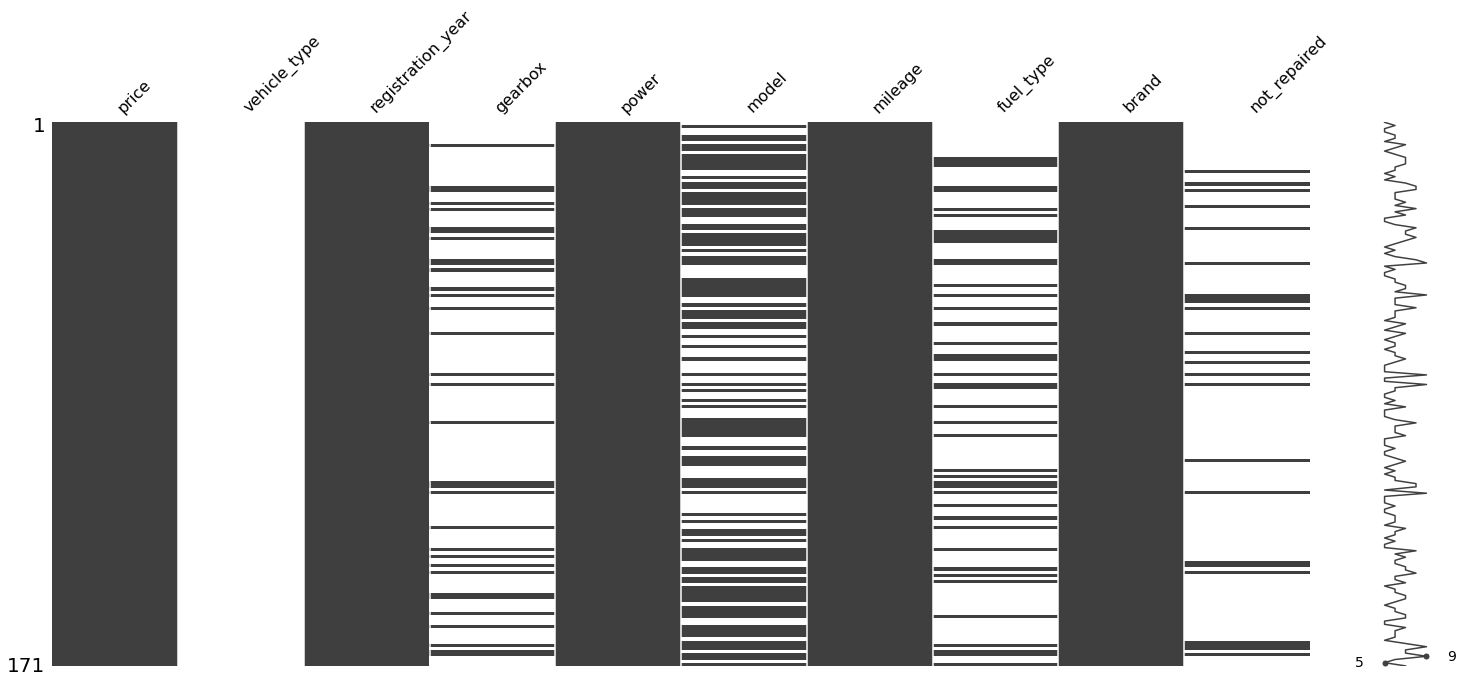

In [63]:
msno.matrix(registration_year_incoherent_data)

En efecto, coinciden varias observaciones con datos ausentes para múltiples características. Dado que rellenar los datos dependerá de valores en otras columnas y hay considerables datos faltantes en varias, no sería adecuado tratar de rellenar estos años. Vamos a eliminar estas observaciones.

Originalmente, car_data tiene esta cantidad de observaciones.

In [64]:
original_len = len(car_data)
original_len

354369

In [65]:
print(f'La cantidad de datos a borrar serían: {len(registration_year_incoherent_data)}')
print(f'Esto equivale al {len(registration_year_incoherent_data)/original_len:.2%} de los datos')

La cantidad de datos a borrar serían: 171
Esto equivale al 0.05% de los datos


In [66]:
car_data = car_data.query("registration_year >= 1886 and registration_year <= 2023")
len(car_data)

354198

##### Price

Hay valores de ceros en Price, que no debería realmente aparecer. Como esta es la variable objetivo, no se tratarán de reemplazar estos datos, solo se eliminarán sus observaciones que tengan Price igual a cero.

In [67]:
priceZero = car_data.query('price == 0')
print(f'La cantidad de datos a borrar serían: {len(priceZero)}')
print(f'Esto equivale al {len(priceZero)/len(car_data):.2%} de los datos')

La cantidad de datos a borrar serían: 10740
Esto equivale al 3.03% de los datos


Es poco más del 3%, no es mayor perdida, continuamos eliminando estas filas.

In [68]:
car_data = car_data.query("price > 0")
len(car_data)

343458

##### Power

Revisaremos la distribución de Power para ver su rango típico claramente. Los valores llegan hasta 20000, pero su percentil 75 es 143. Vamos a mostrar la distribución para los datos menores a 500.

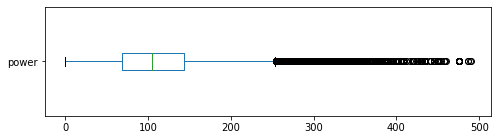

In [70]:
fig = plt.figure(figsize=(8, 2))
car_data.query('power < 500')['power'].plot(kind='box', vert=False)
plt.show()

De acuerdo a esta fuente [link](https://www.jdpower.com/cars/shopping-guides/what-is-the-average-horsepower-of-a-car), los valores de potencia se encuentran alrededor de 200 HP, dependiendo del tamaño del vehículo, puede variar entre 100 a 300 HP. La relación entre CV, que es la unidad de los datos y HP, es `1 CV = 0.986 HP`. La relación es casi 1 a 1, así que podemos comparar los datos de la tabla con los de la fuente. Aunque es raro, sí pueden haber carros de hasta 1200 HP. Entonces los valores por encima de este número no son realistas. 

Tampoco tiene mucho sentido que hayan valores de Power de cero, por lo que vamos a averiguar qué porcentaje representan.

In [72]:
extremePower = car_data.query('power > 1200 or power == 0')
print(f'La cantidad de datos a borrar serían: {len(extremePower)}')
print(f'Esto equivale al {len(extremePower)/len(car_data):.2%} de los datos')

La cantidad de datos a borrar serían: 36496
Esto equivale al 10.63% de los datos


Representan el 10.63% de nuestros datos hasta ahora. Es una décima parte de nuestros datos, pero nos quedaríamos aun con más de 300,000 datos, por lo que optaremos en eliminarlos para mejora la calidad de predicción.

In [74]:
car_data = car_data.query("power <= 1200 and power > 0")
len(car_data)

306962

#### Rellenando ausentes

Vamos a visualizar la distribución de valores ausentes para los datos que nos quedan.

<AxesSubplot:>

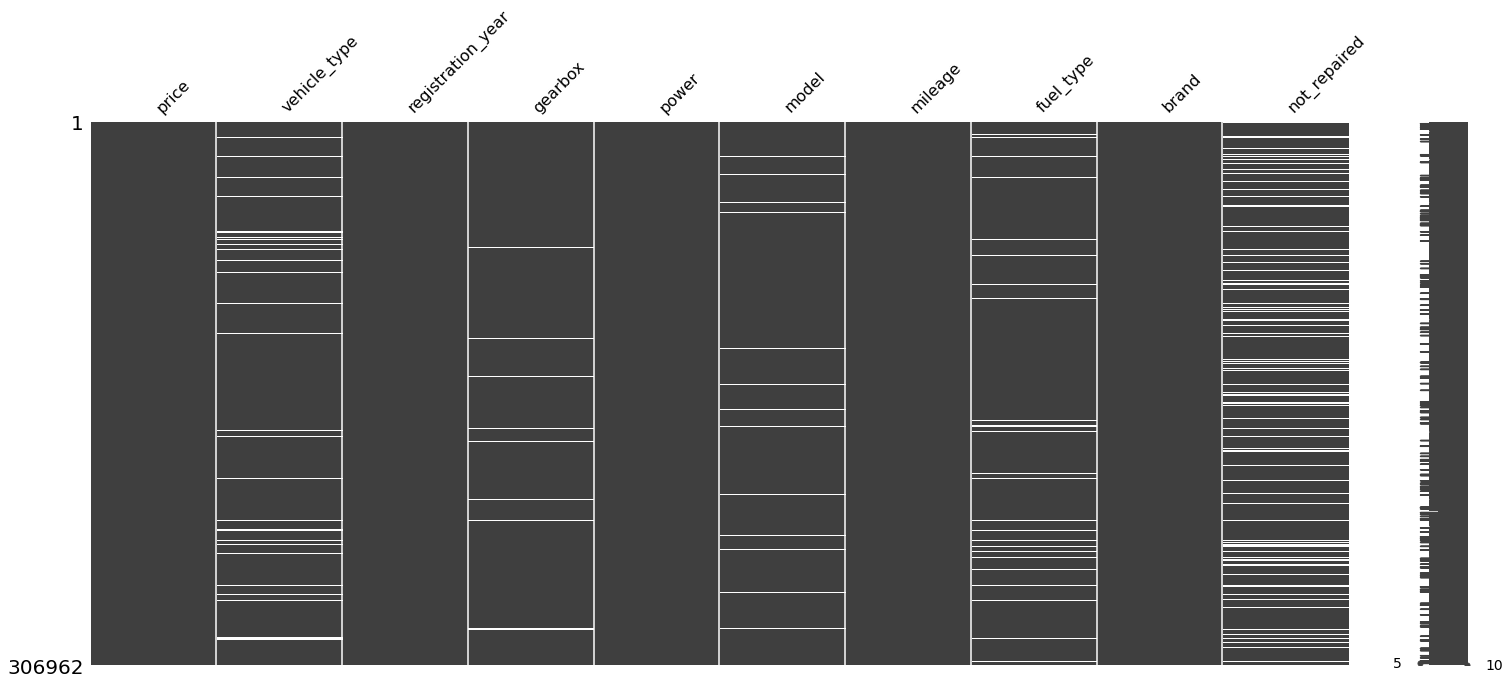

In [75]:
msno.matrix(car_data)

No hay un patrón obvio para ayudarnos a llenar datos con respecto a otra columna. Usaremos una de las librerías de sklearn para realizar el relleno de datos.

In [76]:
features = car_data.drop('price', axis=1)
target = car_data['price'].reset_index(drop=True)
imp_moda = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_moda.fit(features)
filled_features_np = imp_moda.transform(features)
filled_features = pd.DataFrame(filled_features_np, columns = features.columns)

In [77]:
# Volvemos a crear car_data, con los datos de los features y target
car_data = filled_features
car_data['price'] = target                    
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306962 entries, 0 to 306961
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   vehicle_type       306962 non-null  object
 1   registration_year  306962 non-null  object
 2   gearbox            306962 non-null  object
 3   power              306962 non-null  object
 4   model              306962 non-null  object
 5   mileage            306962 non-null  object
 6   fuel_type          306962 non-null  object
 7   brand              306962 non-null  object
 8   not_repaired       306962 non-null  object
 9   price              306962 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 23.4+ MB


Arreglaremos el tipo de variable de las columnas

In [78]:
car_data = car_data.convert_dtypes(convert_integer=False, convert_string=False)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306962 entries, 0 to 306961
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   vehicle_type       306962 non-null  object
 1   registration_year  306962 non-null  int64 
 2   gearbox            306962 non-null  object
 3   power              306962 non-null  int64 
 4   model              306962 non-null  object
 5   mileage            306962 non-null  int64 
 6   fuel_type          306962 non-null  object
 7   brand              306962 non-null  object
 8   not_repaired       306962 non-null  object
 9   price              306962 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 23.4+ MB


Los datos ausentes se llenaron usando el valor más frecuente de cada característica.

#### Reducir categorias en Model

In [80]:
len(car_data.model.unique())

249

Model tiene 249 categorías únicas. Para lidiar con esto, vamos a reducir los modelos según la frecuencia de estos. Los que tengan frecuencia menor a 50, serán eliminados.

In [81]:
car_data.model.value_counts()

golf                  38462
other                 20815
3er                   17782
polo                  11146
corsa                 10559
                      ...  
i3                        5
samara                    5
rangerover                3
serie_3                   3
range_rover_evoque        2
Name: model, Length: 249, dtype: int64

In [83]:
modelos_a_quitar = car_data.model.value_counts().loc[lambda x : x < 50].index

In [84]:
print(f'La cantidad de datos a borrar serían: {len(car_data.query("model in @modelos_a_quitar"))}')
print(f'Esto equivale al {len(car_data.query("model in @modelos_a_quitar"))/len(car_data):.2%} de los datos')

La cantidad de datos a borrar serían: 550
Esto equivale al 0.18% de los datos


In [85]:
car_data = car_data.query('model not in @modelos_a_quitar')

In [86]:
# Reseteamos el index
car_data= car_data.reset_index(drop=True)
car_data

,vehicle_type,registration_year,gearbox,power,model,mileage,fuel_type,brand,not_repaired,price
0,coupe,2011,manual,190,golf,125000,gasoline,audi,yes,18300
1,suv,2004,auto,163,grand,125000,gasoline,jeep,no,9800
2,small,2001,manual,75,golf,150000,petrol,volkswagen,no,1500
3,small,2008,manual,69,fabia,90000,gasoline,skoda,no,3600
4,sedan,1995,manual,102,3er,150000,petrol,bmw,yes,650
...,...,...,...,...,...,...,...,...,...,...
306407,sedan,2016,auto,150,159,150000,petrol,alfa_romeo,no,5250
306408,sedan,2004,manual,225,leon,150000,petrol,seat,yes,3200
306409,convertible,2000,auto,101,fortwo,125000,petrol,smart,no,1199
306410,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no,9200


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hola, Carlos, gracias por la revisión. No me queda claro el primer punto. ¿Cómo aplicaría en este caso?. Las variables con valores ausentes que quedaron fueron todas variables categóricas, por lo que apliqué solo el uso de la moda. 
</div>

### Conclusiones

Se realizó la exploración de datos, donde se determinó que habían ciertos inconvenientes en ellos. Primero se eliminaros características que no deberían influenciar con el precio, como las fechas de registro y el código postal.

Hubieron datos inusuales, como en `registration_year` y `power` donde habían valores sin sentido, ya sea un año que no ocurre aun o un valor de potencia no existente. Estas observaciones fueron eliminados. En Price, se eliminaron aquellas observaciones con precio igual a cero. `number_of_pictures` fue una caracteristica eliminada, ya que solo había un dato único en toda la tabla.

Luego, se rellenaron los datos ausente, considerando la moda para llenarlos, ya que los ausentes eran de variables categóricas. Finalmente, se redugeron las categorías en `model`. Aquellos modelos con frecuencia menor a 50, fueron eliminados. Esto aligera la cantidad de cateogorías y evita que se entrene con pocos valores de dichas categorías.

## Entrenamiento del modelo 

### Regresión lineal

Iniciaremos creando un modelo usando regresión lineal. Separaremos los datos en conjunto de entrenamiento y validación. Ya que trabajamos con datos categóricos, vamos a codificar estas columnas para poder realizar la regresión lineal.

In [91]:
# Obtenemos los datos codificados aplicando el One-Hot Encoding 
data_ohe = pd.get_dummies(car_data)

# Separamos los datos en target y features para luego crear los conjuntos de train y valid
target_ohe = data_ohe['price']
features_ohe = data_ohe.drop('price', axis=1)
X_train_ohe, X_valid_ohe, y_train_ohe, y_valid_ohe = train_test_split(
    features_ohe, target_ohe, test_size=0.25, random_state=12345
)

In [88]:
# Definiendo el modelo de regresión
model_lr = LinearRegression()

# Entrenando modelo
model_lr.fit(X_train_ohe, y_train_ohe)

#Obteniendo la predicción
predicted_valid = model_lr.predict(X_valid_ohe)

In [92]:
result = mean_squared_error(y_valid_ohe, predicted_valid, squared=False)
result

2718.358358118654

Considerando que la media da 4700 aproximadamente, es un valor alto de error. Este modelo no sería muy bueno para predecir, pero nos sirve como prueba de cordura para los demás modelos. Si los otros modelos se crearon correctamente, deberían dar un error menor a este.

### Bosque aleatorio

Aplicaremos Ordinal Encoder para tratar los valores categóricos. Así se podrá usar nuestros datos para entrar un modelo de bosque aleatorio para regresión.

In [93]:
# Definimos las variables categóricas del modelo
cat_variables = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

enc = OrdinalEncoder()

# Realizamos la transformación de los valores categóricos en numéricos
encoded_cat = enc.fit_transform(car_data[cat_variables]) 

In [94]:
# Guardamos la tabla con los datos codificados
car_data_oe = car_data.copy()
car_data_oe[cat_variables] = pd.DataFrame(data=encoded_cat, columns=cat_variables)

In [95]:
# Verificamos que todos los datos son de tipo númerico
car_data_oe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306412 entries, 0 to 306411
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   vehicle_type       306412 non-null  float64
 1   registration_year  306412 non-null  int64  
 2   gearbox            306412 non-null  float64
 3   power              306412 non-null  int64  
 4   model              306412 non-null  float64
 5   mileage            306412 non-null  int64  
 6   fuel_type          306412 non-null  float64
 7   brand              306412 non-null  float64
 8   not_repaired       306412 non-null  float64
 9   price              306412 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 23.4 MB


In [96]:
# Separamos los datos en target y features para luego crear los conjuntos de train y valid
target_oe = car_data_oe['price']
features_oe = car_data_oe.drop('price', axis=1)
X_train_oe, X_valid_oe, y_train_oe, y_valid_oe = train_test_split(
    features_oe, target_oe, test_size=0.25, random_state=12345
)

In [97]:
seed = 333

In [98]:
model_rfr_grid = RandomForestRegressor(random_state=seed)
params={"max_depth": range (12, 22), "n_estimators":range(100, 181, 10)}
gs_rfr = GridSearchCV(
    model_rfr_grid,
    param_grid=params,
    scoring='neg_root_mean_squared_error',
    n_jobs=8
)

In [129]:
%%time
grid_result_rfr = gs_rfr.fit(X_train_oe, y_train_oe)

Wall time: 1h 17min 37s


In [132]:
print("Mejores parámetros encontrados: ", grid_result_rfr.best_params_)
print("RECM: ", -grid_result_rfr.best_score_)

Mejores parámetros encontrados:  {'max_depth': 19, 'n_estimators': 170}
RECM:  1617.0937656940391


La búsqueda con grid search tomó más de una hora y media en resolver todas las combinaciones propuestas para los parámetros de max_depth y n_estimators. Vamos a graficar como varia el tiempo de entrenamiento vs la métrica por cada combinación.Se marcará el punto que representa la mejor combinación encontrada.

In [136]:
table_results_rfr = pd.DataFrame(data=grid_result_rfr.cv_results_)

In [359]:
best_result_from_table = table_results_rfr.query(
    'param_n_estimators == 170 and param_max_depth == 19')
train_time = round(float(best_result_from_table['mean_fit_time']), 3)
best_score = round(float(-grid_result_rfr.best_score_), 3)
print(f'El mejor RECM: {best_score}')
print(f'El entrenamiento tomó {train_time} segundos')

El mejor RECM: 1617.094
El entrenamiento tomó 103.073 segundos


[]

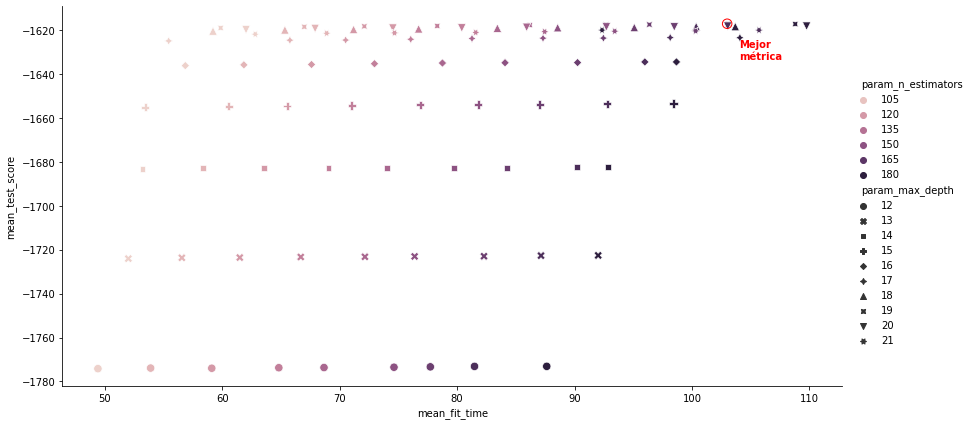

In [210]:
sns.relplot(data=table_results_rfr, x='mean_fit_time', y='mean_test_score',
            hue='param_n_estimators', style="param_max_depth",
            height = 6, aspect = 2, s=70)
plt.scatter(x=train_time , y=best_score, s=90, facecolors='none', edgecolors='r')
plt.text(train_time*1.01, best_score*1.01, "Mejor\nmétrica", horizontalalignment='left', size='medium', color='r', weight='semibold')
plt.plot()

Pareciera que los valores llegan a un tope en la métrica alrededor de 1620. Vamos a mostrar solo los datos donde max_depth sea mayor o igual a 15.

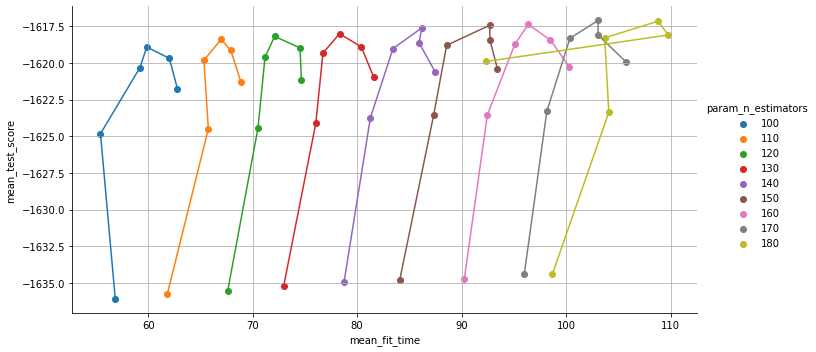

In [214]:
g = sns.FacetGrid(table_results_rfr.query('param_max_depth>15'), hue="param_n_estimators", height = 5, aspect = 2, )
g.map(plt.scatter, "mean_fit_time", "mean_test_score")
g.map(plt.plot, "mean_fit_time", "mean_test_score")
g.add_legend()
plt.grid()
plt.show()

Los valores del score mejoran al aumentar el max_depth, pero parece que llegan a un punto donde se estabiliza y no mejora el error cuadrático medio aunque se siga aumentando el max_depth. A partir de este punto, aumentar el n_estimators sigue mejorando la métrica, sin embargo, el aumento de n_estimators afecta el tiempo de entrenamiento.

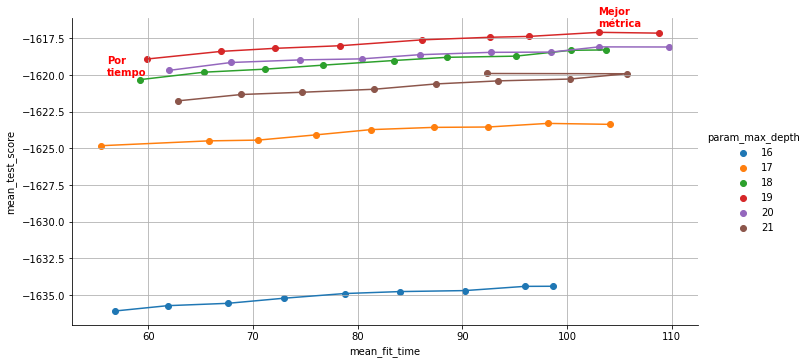

In [213]:
g = sns.FacetGrid(table_results_rfr.query('param_max_depth>15'), hue="param_max_depth", height = 5, aspect = 2, )
g.map(plt.scatter, "mean_fit_time", "mean_test_score")
g.map(plt.plot, "mean_fit_time", "mean_test_score")
g.add_legend()
plt.text(train_time_by_time*0.95, best_score_by_time, "Por\ntiempo", horizontalalignment='left', size='medium', color='r', weight='semibold')
plt.text(train_time, best_score*0.9998, "Mejor\nmétrica", horizontalalignment='left', size='medium', color='r', weight='semibold')
plt.grid()
plt.show()

Misma gráfica, solo se consideró unir los puntos del mismo max_depth. Consideremos la linea de max_depth = 16. Con n=100, el score es 1612 y para n=190, el score es 1608, aproximadamente. El tiempo de entrenamiento casi se duplica entre estos dos modelos. Este patrón es similar para los demás max_depth. 4 euros de error quizás no justifique duplicar los tiempos de entrenamiento.

Entre las profundidades máximas de 18 a 20, no hay mayor variación de sus scores. El max_depth de 18 ofrece la mejor métrica por el menor tiempo. Se usará un modelo cuyos parámetros sean max_depth=18 y n_estimators=100 y también se guardará el modelo que dió la mejor métrica. Luego se comparán en base al resultado con el conjunto de validación.

In [356]:
# obteniendo el tiempo y score del entrenamiento para max_depth=18 y n_estimators=100
best_result_by_time = table_results_rfr.query(
    'param_n_estimators == 100 and param_max_depth == 18')
train_time_by_time_rfr = round(float(best_result_by_time['mean_fit_time']),3)
best_score_by_time_rfr = -round(float(best_result_by_time['mean_test_score']),3)
print(f'El mejor RECM considerando el tiempo: {best_score_by_time_rfr}')
print(f'El entrenamiento tomó {train_time_by_time_rfr} segundos en promedio')

El mejor RECM considerando el tiempo: 1620.319
El entrenamiento tomó 59.201 segundos en promedio


Tenemos los tiempos de entrenamiento y el RECM para estos dos modelos, vamos a determinar el tiempo de predicción.

#### Predicción

Considerando el mejor score, tenemos ya el modelo entrenado, solo queda aplicar el predict a los datos de validación. Primero, se calculará cuánto demora en promedio hacer la predicción.

In [337]:
predict_time_by_best_score_rfr = %timeit -n5 -r3 -o gs_rfr.predict(X_valid_oe)
predict_time_by_best_score_rfr.average

The slowest run took 80.46 times longer than the fastest. This could mean that an intermediate result is being cached.
1min 14s ± 1min 41s per loop (mean ± std. dev. of 3 runs, 5 loops each)


74.6411129666667

Conociendo el tiempo, continuamos obteniendo la predicción para calcular el error en el conjunto de validación.

In [247]:
pred_rf_best_score = gs_rfr.predict(X_valid_oe)
metric_rfr_by_best_score = mean_squared_error(y_valid_oe, pred_rf_best_score, squared=False)
metric_rfr_by_best_score

1600.6292720509025

Comparado con el RECM del entrenamiento, se obtuvo un resultado similar en la validación, podría ser un modelo válido para comparar luego con los demás tipos de modelos.

Ahora, se considerará el modelo que toma en cuenta un menor tiempo.

In [248]:
params_best_by_time = {'max_depth': 18, 'n_estimators': 100}
# Guardando el modelo con max_depth=18 y n_estimators=100
model_rf_best_by_time = RandomForestRegressor(random_state=seed, **params_best_by_time)
model_rf_best_by_time.fit(X_train_oe, y_train_oe)

RandomForestRegressor(max_depth=18, random_state=333)

In [257]:
predict_time_by_best_time_rfr = %timeit -n5 -r3 -o model_rf_best_by_time.predict(X_valid_oe)
predict_time_by_best_time_rfr.average

1.51 s ± 12.2 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


1.512792100000661

In [250]:
pred_rf_best_time = model_rf_best_by_time.predict(X_valid_oe)
metric_rfr_by_time = mean_squared_error(y_valid_oe, pred_rf_best_time, squared=False)
metric_rfr_by_time

1603.195679882163

En el entrenamiento se obtuvo 1620 como RECM. Podría ser un modelo también válido. Tiene un error mayor por 3 euros pero no es significativo. Dado que este último modelo brinda casi mitad de tiempo de entrenamiento y predicción, se obtará por usar este último para comparar los resultados con los demás modelos acontinuación.

### LightGBM 

Ahora usaremos un modelo de gradient boosting. LightGBM maneja por su cuenta los valores categóricos por lo que no hay de usar los datos codificados. Solo hay que asegurar que las columnas que son categóricas, sean de tipo category para que los reconozca el algoritmo.

In [108]:
for c in cat_variables:
    car_data[c] = car_data[c].astype('category')

# Separamos los datos en target y features para luego crear los conjuntos de train y valid
target = car_data['price']
features = car_data.drop('price', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

Ahora aplicaremos un grid search para encontrar los parámetros que nos de la mejor raiz del error cuadrático medio.

In [116]:
model_lGBM = lgb.LGBMRegressor(random_state=seed)
params_lGBM={"learning_rate": [0.001, 0.01, 0.1, 1],
             "max_depth": range(5, 21),
             "n_estimators": range(100,151,10)
             } 
gs_lGBM = GridSearchCV(
    model_lGBM,
    param_grid=params_lGBM,
    scoring='neg_root_mean_squared_error',
    n_jobs=6
)

In [117]:
%%time
grid_result_lGBM = gs_lGBM.fit(X_train, y_train)

Wall time: 1min 55s


In [123]:
print("Mejores parámetros encontrados con LightGBM: ", grid_result_lGBM.best_params_)
print("RECM: ", -grid_result_lGBM.best_score_)

Mejores parámetros encontrados con LightGBM:  {'learning_rate': 0.1, 'max_depth': 15}
RECM:  1659.431677942072


Vamos a revisar como se ve la relación de la métrica y tiempo para cada combinación. Revisaremos solo una parte de la tabla, aquellos con learning rate mayor a 0.06

In [252]:
tabla_resultados_lGBM = pd.DataFrame(data=grid_result_lGBM.cv_results_)

In [353]:
best_result_from_table = tabla_resultados_lGBM.query(
    'param_learning_rate == 0.1 and param_max_depth == 15')
train_time_lGBM= round(float(best_result_from_table['mean_fit_time']),3)
train_score_lGBM = round(float(grid_result_lGBM.best_score_),3)
print(f'El mejor RECM: {train_score_lGBM}')
print(f'El entrenamiento tomó {train_time_lGBM} segundos')

El mejor RECM: -1659.432
El entrenamiento tomó 2.009 segundos


[]

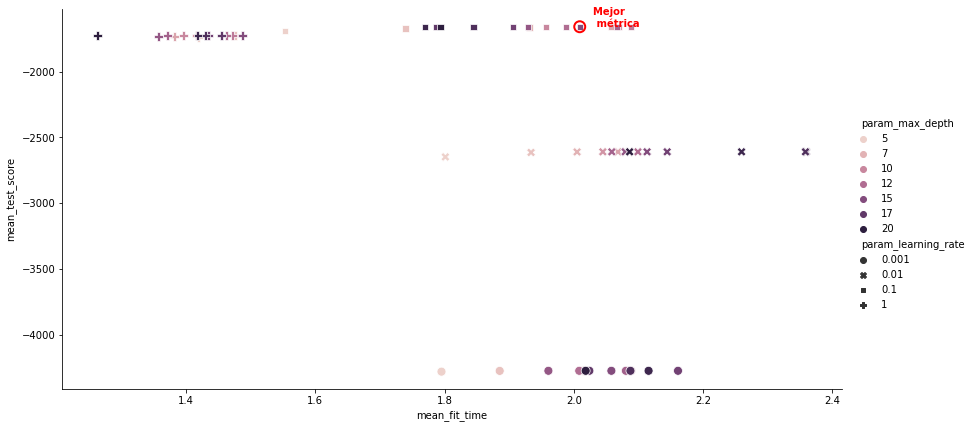

In [254]:
sns.relplot(data=tabla_resultados_lGBM, x='mean_fit_time', y='mean_test_score',
            hue='param_max_depth', style="param_learning_rate",
            height = 6, aspect = 2, s=80)
plt.scatter(x=train_time , y=best_score, s=120, facecolors='none', edgecolors='r', linewidth=2)
plt.text(train_time*1.01, best_score*1, "Mejor \n métrica", horizontalalignment='left', size='medium', color='r', weight='semibold')
plt.plot()

Los valores parecen llegar a un máximo de score alrededor de 1660. Aunque se podría considerar otro punto que tenga similar métrica por menor tiempo, el tiempo que se ganaría sería de menos de un segundo. No se considerará otro segundo modelo. Se analizarán los resultados solo con el modelo que dió la mejor puntuación.

#### Predicción

In [327]:
predict_time_lGBM = %timeit -n5 -r3 -o gs_lGBM.predict(X_valid)
predict_time_lGBM.average

97.4 ms ± 3.52 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


0.09743395333255951

In [323]:
pred_lGBM_best_score = gs_lGBM.predict(X_valid)
metric_lGBM = mean_squared_error(y_valid, pred_lGBM_best_score, squared=False)
metric_lGBM

1643.9921642996517

Al validar el modelo, se obtuvo un RECM de 1644 euros. Comparado con la métrica obtenida en el entrenamiento, 1659, hay poca diferencia. Tomaremos este modelo para comparar con los demás.

### CatBoost

Similar a LightGBM, no es necesario codificar los datos. Vamos a buscar la combinación de parámetros que nos de el mejor RECM. 

In [284]:
model_cB_grid = CatBoostRegressor(loss_function="RMSE", random_seed=seed, iterations=100, cat_features=cat_variables, logging_level='Silent') 
params_cB={"learning_rate": [0.001, 0.01, 0.1, 1],
             "max_depth": range(5, 16)
        } 
gs_cB = GridSearchCV(
    model_cB_grid,
    param_grid=params_cB,
    scoring='neg_root_mean_squared_error',
    n_jobs=6
)

In [285]:
%%time
grid_result_cB = gs_cB.fit(X_train, y_train)

Wall time: 21min 47s


In [286]:
print("Mejores parámetros encontrados para CatBoost: ", grid_result_cB.best_params_)
print("RECM: ", -grid_result_cB.best_score_)

Mejores parámetros encontrados para CatBoost:  {'learning_rate': 0.1, 'max_depth': 15}
RECM:  1639.9340260368695


In [300]:
table_results_cB = pd.DataFrame(data=grid_result_cB.cv_results_)

In [360]:
best_result_from_table = table_results_cB.query(
    'param_learning_rate == 0.1 and param_max_depth == 15')
train_time_cB= round(float(best_result_from_table['mean_fit_time']), 3)
train_score_cB = round(float(grid_result_cB.best_score_), 3)
print(f'El mejor RECM: {train_score_cB}')
print(f'El entrenamiento tomó {train_time_cB} segundos en promedio')

El mejor RECM: -1639.934
El entrenamiento tomó 111.273 segundos en promedio


[]

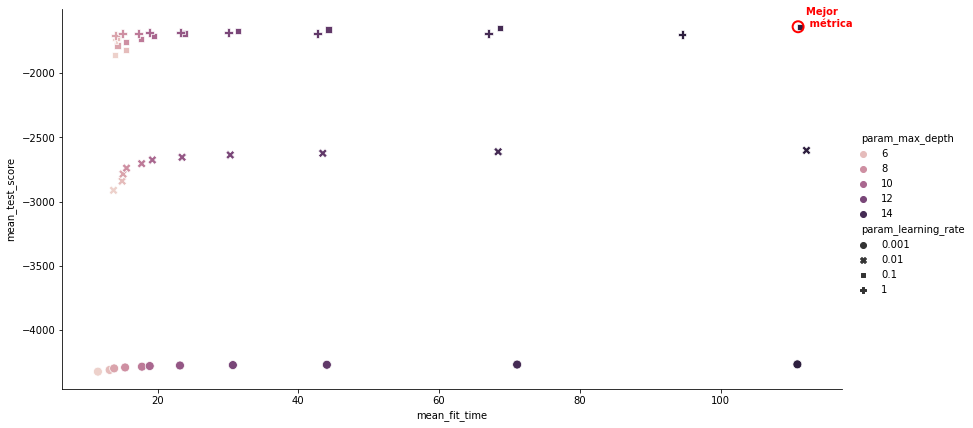

In [302]:
sns.relplot(data=table_results_cB, x='mean_fit_time', y='mean_test_score',
            hue='param_max_depth', style="param_learning_rate",
            height = 6, aspect = 2, s=80)
plt.scatter(x=train_time_cB , y=train_score_cB, s=120, facecolors='none', edgecolors='r', linewidth=2)
plt.text(train_time_cB*1.01, train_score_cB*1, "Mejor \n métrica", horizontalalignment='left', size='medium', color='r', weight='semibold')
plt.plot()

Los mejores resultado se obtuvieron con una tasa de aprendizaje de 0.1. Ocurre algo similar a lo que ocurría con el modelo de bosque aleatorio, donde la mejor metríca quizás no sea la mejor opción. Vamos a revisar la gráfica de mean_test_score vs mean_fit_time de nuevo, pero solo considerando los resultados de learning rate igual a 0.1.

[]

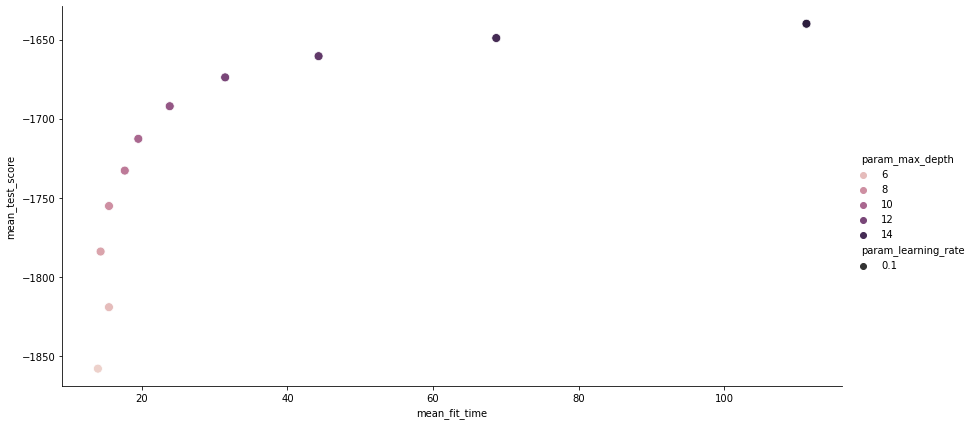

In [303]:
sns.relplot(data=table_results_cB.query('param_learning_rate == 0.1'), x='mean_fit_time', y='mean_test_score',
            hue='param_max_depth', style="param_learning_rate",
            height = 6, aspect = 2, s=80)
plt.plot()

Para un max_depth de 14 se obtiene la mejor puntuación pero con un max_depth de 12 se obtendría algo similar, por más de la mitad del tiempo. Vamos a obtener los valores relaciones a este punto.

In [304]:
# obteniendo el tiempo y score del entrenamiento para max_depth=18 y n_estimators=100
best_result_by_time_cB = table_results_cB.query(
    'param_learning_rate == 0.1 and param_max_depth == 12')
train_time_by_time_cB = int(best_result_by_time_cB['mean_fit_time'])
best_score_by_time_cB = int(best_result_by_time_cB['mean_test_score'])
print(f'El mejor RECM considerando el tiempo: {best_score_by_time_cB}')
print(f'El entrenamiento tomó {train_time_by_time_cB} segundos en promedio')

El mejor RECM considerando el tiempo: -1673
El entrenamiento tomó 31 segundos en promedio


#### Predicción

Obtenemos el tiempo que demora la predicción y el RECM para el modelo con la mejor métrica.

In [320]:
predict_time_by_best_score_cB = %timeit -n5 -r3 -o gs_cB.predict(X_valid)
predict_time_by_best_score_cB.average

54.3 ms ± 1.6 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


0.05428609999944456

In [315]:
pred_cB_best_score = gs_cB.predict(X_valid)
metric_cB_by_best_score = mean_squared_error(y_valid, pred_cB_best_score, squared=False)
metric_cB_by_best_score

1639.074743000049

Prácticamente son iguales los valores de errores entre el conjunto de entrenamiento y de validación. Verificamos ahora con el modelo que considera un mejor tiempo de entrenamiento.

In [ ]:
# Guardando el modelo con max_depth=18 y n_estimators=100
model_rf_best_by_time = RandomForestRegressor(random_state=seed, **params_best_by_time)
model_rf_best_by_time.fit(X_train_oe, y_train_oe)

In [308]:
params_best_by_time = {'learning_rate': 0.1, 'max_depth': 12}
model_cB_grid_by_time = CatBoostRegressor(loss_function="RMSE", random_seed=seed, iterations=100, cat_features=cat_variables, logging_level='Silent', **params_best_by_time) 
model_cB_grid_by_time.fit(X_train, y_train)

In [321]:
predict_time_by_best_time_cB = %timeit -n5 -r3 -o model_cB_grid_by_time.predict(X_valid)
predict_time_by_best_time_cB.average

50.9 ms ± 1.02 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


0.05086402000063875

In [318]:
pred_cB_best_time = model_cB_grid_by_time.predict(X_valid)
metric_cB_by_best_time = mean_squared_error(y_valid, pred_cB_best_time, squared=False)
metric_cB_by_best_time

1667.5965956936295

Los RECM son similares entre los datos de entrenamiento y validación, el ajuste parece adecuado. Comparándolo con el modelo que considera la mejor métrica, tiene mayor error este modelo, con una diferencia de precio de poco menos de 30 euros.

Los tiempos de entrenamiento son distintos, le toma 111 segundos en promedio entrenar el primer modelo pero este último tomó 31 segundos. Los tiempos de predicción son bajos en ambos y muy similares. Dado que el modelo es para que la app pueda valorar un coche que quiera vender un usuario, el entrenamiento no se daría tan frecuente como lo sería las predicciones. Debería pesar más el tiempo de predicción. Se tomará el modelo que nos dió menor error de RECM, es decir, el modelo de los parámetros encontrados por el GridSearchCV.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en esta sección.
</div>

## Análisis del modelo

Ahora compararemos los resultados de los modelos de bosque aleatorio, LightGBM y CatBoost.

In [361]:
resumen_modelos = {
    'Tiempo De Entrenamiento [s]':[train_time_by_time_rfr, train_time_lGBM, train_time_cB],
    'Tiempo De Predicción [s]': [predict_time_by_best_time_rfr.average, predict_time_lGBM.average, predict_time_by_best_score_cB.average],
    'RECM [€]' :[best_score_by_time_rfr, metric_lGBM, metric_cB_by_best_score]}
index = ['Bosque Aleatorio', 'LightGBM', 'CatBoost']

In [362]:
pd.DataFrame(data=resumen_modelos, index=index)

,Tiempo De Entrenamiento [s],Tiempo De Predicción [s],RECM [€]
Bosque Aleatorio,59.201,1.512792,1620.319000
LightGBM,2.009,0.097434,1643.992164
CatBoost,111.273,0.054286,1639.074743


El modelo de regresión lineal resultó en una RECM de 2718. Todos nuestros modelos finales pasan la prueba de cordura, al tener menor error.

Entre los 3, la mejor métrica se encuentra con bosque aleatorio. Sin embargo, tiene el tiempo de predicción más alto de los 3, aunque no es por mucho viendo los valores absolutos.

CatBoost tuvo el tiempo de entrenamiento más largo. Se podría conseguir menores tiempos aun, pero a costa de aumentar el RECM de la predicción. El modelo de CatBoost nos da el menor tiempo de predicción de los tres. 

LightGBM tiene un tiempo de entrenamiento muy bajo comparado al resto. Tiene la peor métrica, pero la diferencia es de 23 euros con respecto a la mejor predicción.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo bien en esta sección y concuerdo con las conclusiones.
</div>

## Conclusiones

Comenzamos con datos históricos de autos que estuvieron a la venta en la web. El objetivo es predecir el precio de un auto en base a las características de este, para una app que averigua el precio de un coche de segunda mano que desee vender un usuario. Se deberá comparar los tiempos de entrenamiento y predicción, y la métrica de varios modelos.

Se realizó la exploración de datos, donde se eliminaron carácterísticas de tipo fecha, ya que no deberían ser determinantes en la predicción del precio. También ciertos datos inuales fueron revisados, ya sea precios igual a cero, o años anteriores a la creación del auto. Se tratarón los valores ausentes usando la moda de cada característica, dado que eran variable categóricas. También se eliminaron algunas categorías que tuvieran poca frecuencia.

El entrenamiento de modelos se realizó en 4 tipos diferentes. Se hizo una regresión lineal, cuyo RECM fue de 2718. Este modelo sirvió como prueba de cordura, los demás modelos que entrenaramos deberían dar mejor resultado que la regresión lineal.

Luego se realizó el entrenamiento de modelos aplicando bosque aleatorio, LightGBm y CatBoost. Se aplicó un GridSearchCV a cada uno para encontrar el set de parámetros que den las mejores métricas. En el caso de bosque aleatorio y CatBoost, no se eligió el modelo de la mejor métrica, pero sí uno con un métrica cercana a la mejor pero que tomará casi la mitad del tiempo de entrenamiento.

Las predicciones varian de 1620 a 1643, en términos de precisión son muy similares. Principalmente varían en los tiempos de entrenamiento y predicción. El modelo de LightGBM destacó por tener un tiempo de entrenamiento mucho menor a los demás modelos. A pesar de tener el peor RECM del grupo, no es una diferencia significante. Este bajo tiempo de entrenamiento podría permitir variar otros hiperparámetros al aplicar el GridSearchCV para mejor la métrica, sin que este tenga que tomar extensos tiempos como los otros dos modelos. Además, su tiempo de predicción es bueno, aproximadamente un segundo para todos los datos de validación.

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo el que se ha realizado en este proyecto. Sin embargo, nos quedan algunos detalles pendientes en lo referente a la limpieza que debemos corregir antes de aprobarlo. He dejado comentarios en esta sección del documento para ello.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo. Todo ha sido corregido y has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en orden de ejecución
- [x]  Los datos han sido descargados y preparados
- [x]  Los modelos han sido entrenados
- [x]  Se realizó el análisis de velocidad y calidad de los modelos